<a href="https://colab.research.google.com/github/BarryBadhusha/MachineLearning_Binge/blob/master/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Loading Automobile Dataset**

In [0]:
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


**Simple Linear Regression**

Formulae :  Y= mX + c

**Y** => *Dependent Variable*

**X** => *Independent Variable*

**c** => *Intercept*

**m** => *Co-efficient*

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 

In [0]:
regressor = LinearRegression()
X = df[['highway-mpg']]
Y = df['price']
regressor.fit(X,Y)
# X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.1,random_state = 0)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
Y_ = regressor.predict(X)


In [0]:
regressor.intercept_ ##Intercept value after training

38423.3058581574

In [0]:
regressor.coef_ ##Coefficient value after training

array([-821.73337832])

Now the function can be rephrased as 

***price = 38423.30 + ( - 821.733 ) * highway-mpg***

In [0]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


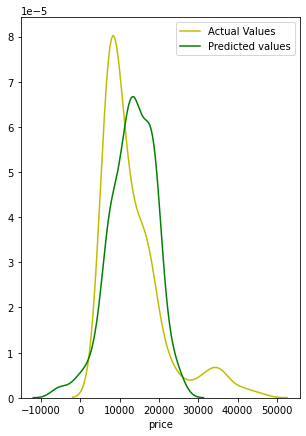

In [0]:
plt.figure(figsize=(5,7))
ax = sns.distplot(df['price'],color='y',label='Actual Values',hist=False)
sns.distplot(Y_,color='g',label='Predicted values',ax=ax,hist=False)
plt.show()
plt.close()

**Finding out which feature has more correlation with price**

In [0]:
df[['price','highway-mpg','city-mpg','horsepower','compression-ratio','city-L/100km','wheel-base','engine-size','stroke']].corr()

,price,highway-mpg,city-mpg,horsepower,compression-ratio,city-L/100km,wheel-base,engine-size,stroke
price,1.000000,-0.704692,-0.686571,0.809575,0.071107,0.789898,0.584642,0.872335,0.082310
highway-mpg,-0.704692,1.000000,0.972044,-0.804575,0.268465,-0.930028,-0.543304,-0.679571,-0.035201
city-mpg,-0.686571,0.972044,1.000000,-0.822214,0.331425,-0.949713,-0.470606,-0.650546,-0.034696
horsepower,0.809575,-0.804575,-0.822214,1.000000,-0.214514,0.889488,0.371147,0.822676,0.098462
compression-ratio,0.071107,0.268465,0.331425,-0.214514,1.000000,-0.299372,0.250313,0.028889,0.187923
city-L/100km,0.789898,-0.930028,-0.949713,0.889488,-0.299372,1.000000,0.476153,0.745059,0.037300
wheel-base,0.584642,-0.543304,-0.470606,0.371147,0.250313,0.476153,1.000000,0.572027,0.158502
engine-size,0.872335,-0.679571,-0.650546,0.822676,0.028889,0.745059,0.572027,1.000000,0.209523
stroke,0.082310,-0.035201,-0.034696,0.098462,0.187923,0.037300,0.158502,0.209523,1.000000


As from above observation, among all features **engine-size** and **horsepower** have more corellation with price.  So will train the mode using these features.

In [0]:
regressor_es = LinearRegression() #Regression Object for Engine Size
X_e = df[['engine-size']]
Y_e = df['price']
regressor_es.fit(X_e,Y_e)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
Y_es = regressor_es.predict(X_e)

In [0]:
regressor_es.intercept_

-7963.338906281042

In [0]:
regressor_es.coef_

array([166.86001569])

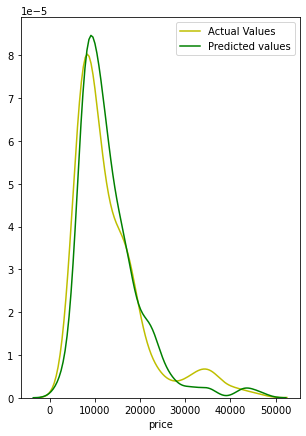

In [0]:
plt.figure(figsize=(5,7))
ax_es = sns.distplot(df['price'],color='y',label='Actual Values',hist=False)
sns.distplot(Y_es,color='g',label='Predicted values',ax=ax_es,hist=False)
plt.show()
plt.close()

**Multiple Linear Regression**

In [0]:
X_multi = df[['highway-mpg','city-mpg','horsepower','city-L/100km','engine-size','curb-weight','peak-rpm']]
Y_multi = df['price']

In [0]:
regressor_multi = LinearRegression()
regressor_multi.fit(X_multi,Y_multi)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
regressor_multi.coef_

array([1.35346677e+02, 3.68685620e+02, 5.02711848e+00, 1.68814066e+03,
       8.49744641e+01, 5.48101855e+00, 1.46909453e+00])

In [0]:
regressor_multi.intercept_

-49843.49602028663

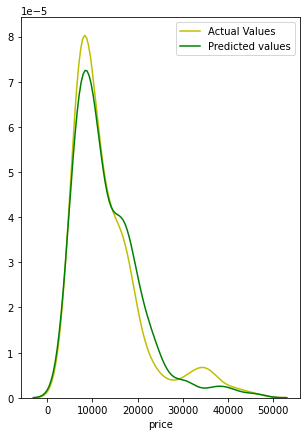

In [0]:
Y_multi_predict = regressor_multi.predict(X_multi)
plt.figure(figsize=(5,7))
ax_multi = sns.distplot(df['price'],color='y',label='Actual Values',hist=False)
sns.distplot(Y_multi_predict,color='g',label='Predicted values',ax=ax_multi,hist=False)
plt.show()
plt.close()


Plot between **engine-size** and **price** to check the linearity of data.

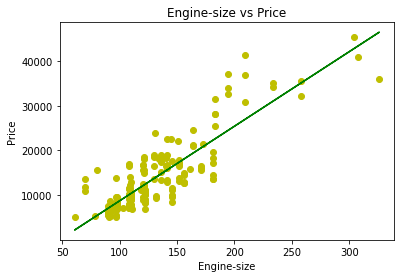

In [0]:
plt.scatter(X_e,df['price'],color='y')
plt.plot(X_e,Y_es,color='g')
plt.xlabel('Engine-size')
plt.ylabel('Price')
plt.title('Engine-size vs Price')
plt.show()
plt.close()


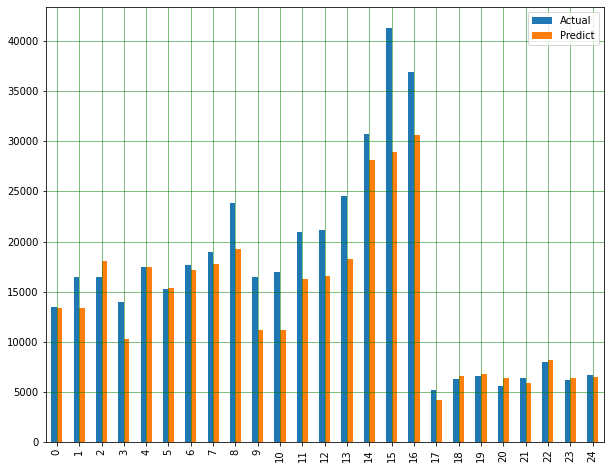

In [0]:
df_barplot = pd.DataFrame({'Actual':df['price'],'Predict':Y_multi_predict})
df_barplot = df_barplot.head(25)
df_barplot.plot(kind='bar',figsize=(10,8),)
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()